     product  total_quantity  revenue
0  Product A              10     50.0
1  Product B              20    150.0
2  Product C              15    150.0
3  Product D               5     60.0


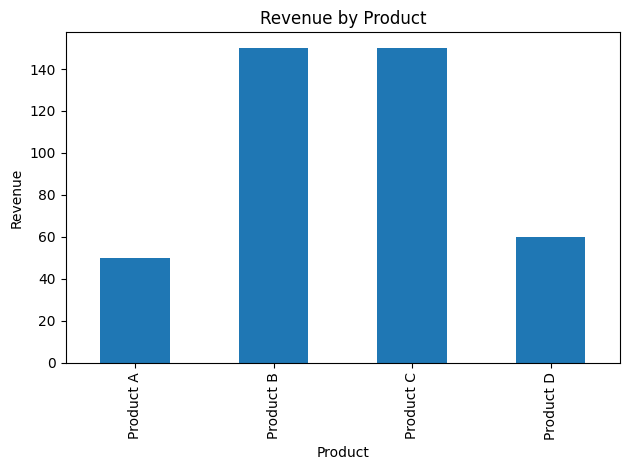

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create an in-memory SQLite database and table for the demonstration
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create a sales table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sales_data = [
    (1, 'Product A', 10, 5.0),
    (2, 'Product B', 20, 7.5),
    (3, 'Product C', 15, 10.0),
    (4, 'Product D', 5, 12.0)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?, ?)", sales_data)
conn.commit()

# SQL Query to get total quantity sold and total revenue per product
query = '''
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load into pandas
df = pd.read_sql_query(query, conn)

# Print results
print(df)

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.tight_layout()
plt.show()

# Close connection
conn.close()
